# Teste passo-a-passo

In [245]:
import requests
from bs4 import BeautifulSoup
import re
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
"https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=1&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347"
"https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=2&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347"
"https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=3&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347"

In [350]:
for i in get_sites_roomgo(5): print(i)

https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=2&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347
https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=3&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347
https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=4&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347


In [347]:
url = "https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag=3&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347"
req = requests.get(url)
html = req.text
print(req)

<Response [200]>


In [348]:
soup = BeautifulSoup(html)
ruas = soup.find_all("span", string = re.compile("(Rua|Av)"))
ruas = [i.string for i in ruas]
ruas = [re.findall("[Rua|Av].*\n", i)[0][:-1] for i in ruas]
bairros = [re.search(",.*", i).group()[2:] for i in ruas]
bairros

['Bela Vista',
 'Barra da Tijuca',
 'Vila Yara',
 'Vila Yara',
 'Vila Isabel',
 'Vila Matilde',
 'Vila Isabel',
 'Tatuapé',
 'Centro',
 'Jardim Paulista',
 'Pinheiros',
 'Maracanã',
 'Bela Vista',
 'Vila Mariana',
 'Vila Mariana']

In [349]:
texto = soup.get_text(strip = True)
match = re.findall("[0-9.]* Por mês", texto)
precos = [i[:-8] for i in match]
precos = [re.sub("\.", "", i) for i in precos]
precos

['500',
 '1050',
 '1150',
 '880',
 '830',
 '1100',
 '850',
 '500',
 '750',
 '1200',
 '1000',
 '1300',
 '1500',
 '750',
 '1500']

# FUNÇÃO

In [ ]:
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import requests
import re

print("Define a quantidade de páginas a serem importadas")
def get_sites_roomgo(num):
    sites = []
    for i in range(1,num):
        site = "https://www.roomgo.com.br/search/rooms/L21122818404351?rmin=0&rmax=5000&bed=1&pic=1&doub=0&furn=0&shor=0&amin=18&amax=99&hideagent=0&pag={numero}&srt=3&mvdt=2021-12-28&rad=20000&lat=-23.5630037&lng=-46.6864347".format(numero)
        sites.append(site)
    return(sites)

print("Obs.: Se Response = 200, o request foi feito com sucesso")
print("--------------------------------------------------------")
n = int(input("Quantos sites serão importados? "))
urls = get_sites_roomgo(n)

total_precos = []
total_bairros = []
for url in urls:
    # Obtendo a n-ésima página
    req = requests.get(url)
    print(req)
    html = req.text
    soup = BeautifulSoup(html)
    
    # Obtendo Bairros
    ruas = soup.find_all("span", string = re.compile("(Rua|Av)"))
    ruas = [i.string for i in ruas]
    ruas = [re.findall("[Rua|Av].*\n", i)[0][:-1] for i in ruas]
    bairros = [re.search(",.*", i).group()[2:] for i in ruas]
    
    # Obtendo preços
    texto = soup.get_text(strip = True)
    match = re.findall("[0-9.]* Por mês", texto)
    precos = [i[:-8] for i in match]
    precos = [re.sub("\.", "", i) for i in precos]
    
    total_precos.append(precos)
    total_bairros.append(bairros)    
    sleep(1)

precos = [int(linha) for coluna in total_precos for linha in coluna]
bairros = [linha for coluna in total_bairros for linha in coluna]

df = pd.DataFrame({"Preço" : precos, "Bairro" : bairros})
df.to_csv("Aluguéis SP por Bairro.csv")

# Análise dos Dados

In [339]:
list(set(precos))

[1150, 1000, 1100, 750, 880, 1200, 850, 500, 1300, 1050, 1500, 830]

In [340]:
df.describe()

,Preço
count,120.000000
mean,990.666667
std,301.758803
min,500.000000
25%,750.000000
50%,1000.000000
75%,1200.000000
max,1500.000000


### Média de preços por bairro

<AxesSubplot:title={'center':'Média do Aluguel por Bairro'}, xlabel='Bairro'>

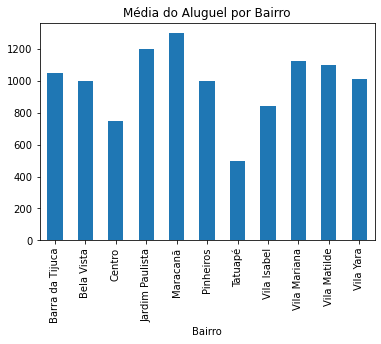

In [330]:
df.groupby("Bairro")["Preço"].mean().plot(kind = "bar", title = "Média do Aluguel por Bairro")

In [326]:
df.groupby("Bairro")["Preço"].count()

Bairro
Barra da Tijuca    3
Bela Vista         6
Centro             3
Jardim Paulista    3
Maracanã           3
Pinheiros          3
Tatuapé            3
Vila Isabel        6
Vila Mariana       6
Vila Matilde       3
Vila Yara          6
Name: Preço, dtype: int64